accuracy =  78.0 %


/tmp/ipykernel_24325/3027824433.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainData = np.asarray(dfTrain.drop('Outcome',1))
/tmp/ipykernel_24325/3027824433.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testData = np.asarray(dfTest.drop('Outcome',1))


Text(0.5, 0, 'Importance')

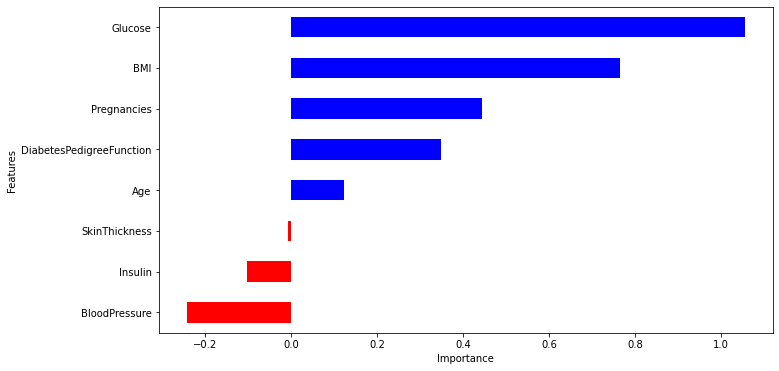

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib

df = pd.read_csv('data/diabetes.csv')

dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]

trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))


means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

logistic_regression = LogisticRegression()
logistic_regression.fit(trainData, trainLabel)

accuracy = logistic_regression.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

coeff = list(logistic_regression.coef_[0])
trainLIST= list(trainData)
df = pd.DataFrame(trainLIST).rename(columns={0:'Pregnancies', 1:'Glucose', 2:'BloodPressure', 3:'SkinThickness',4:'Insulin', 5:'BMI', 6:'DiabetesPedigreeFunction', 7:'Age'})
labels = df.columns
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

accuracy =  79.22077922077922 %


/tmp/ipykernel_24325/1540308331.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop(['Outcome'],1)
/home/romulo/Documentos/webapp-ml-streamlit/webapp-ml-streamlit-venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Importance')

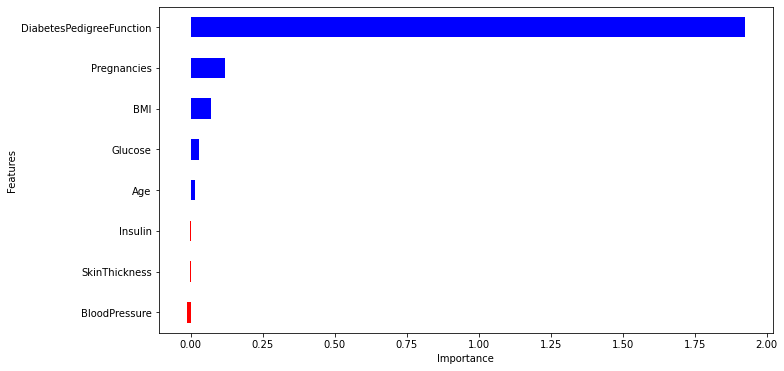

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib

df = pd.read_csv('data/diabetes.csv')

x = df.drop(['Outcome'],1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

accuracy = logistic_regression.score(x_test, y_test)
print("accuracy = ", accuracy * 100, "%")

coeff = list(logistic_regression.coef_[0])
labels = list(x_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')